In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1D Benchmarking for 10 particles on 10 sites

In [24]:
# Skip the commented header line that starts with #
vmc_1D_path = "../data/1D_VMC_results.dat"
df_VMC_1D = pd.read_csv(vmc_1D_path, delim_whitespace=True, comment='#', names=["U", "kappa", "energy", "sem"])

exact_1D_path = "../data/exact_1D_10_10.dat"
df_exact_1D = pd.read_csv(exact_1D_path, delim_whitespace=True, comment="#", header=None)
df_exact_1D.columns = ["U", "Eg", "K", "V", "S₁(ℓ=5)", "S₁acc(ℓ=5)", "S₂(ℓ=5)", "S₂acc(ℓ=5)", "EN(ℓ=5)", "ENacc(ℓ=5)"]

df_1D = pd.merge(df_exact_1D, df_VMC_1D, on="U")

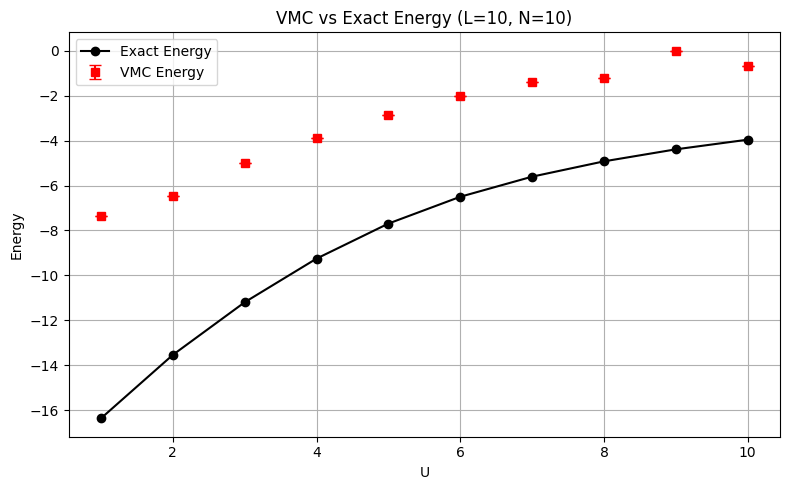

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(df_1D["U"], df_1D["Eg"], label="Exact Energy", marker='o', color='black')
plt.errorbar(df_1D["U"], df_1D["energy"], yerr=df_1D["sem"], label="VMC Energy", fmt='s', capsize=4, color='red')

plt.xlabel("U")
plt.ylabel("Energy")
plt.title("VMC vs Exact Energy (L=10, N=10)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("./figures/1D_10_10.pdf", dpi=600)
plt.show()

# 2D Benchmarking for 4 particles on a 2x2 lattice 

In [28]:
vmc_2D_path = "../data/2D_VMC_results.dat"
df_VMC_2D = pd.read_csv(vmc_2D_path, delim_whitespace=True, comment='#', names=["U", "kappa", "energy", "sem"])

In [11]:
def exact_2D_energy(U, t):
    return (1.0/2.0)*(U-np.sqrt(U**2 + 96*t**2))

exact_2D_energy_v = np.vectorize(exact_2D_energy)

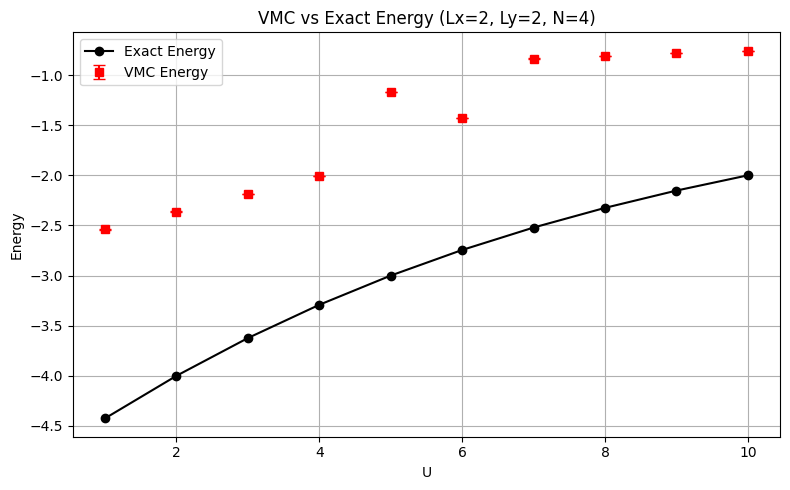

In [29]:
U = [i +1 for i in range(10)]

plt.figure(figsize=(8, 5))
plt.plot(U, exact_2D_energy_v(U,1), label="Exact Energy", marker='o', color='black')
plt.errorbar(df_VMC_2D["U"], df_VMC_2D["energy"], yerr=df_VMC_2D["sem"], label="VMC Energy", fmt='s', capsize=4, color='red')

plt.xlabel("U")
plt.ylabel("Energy")
plt.title("VMC vs Exact Energy (Lx=2, Ly=2, N=4)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("./figures/2D_2_4.pdf", dpi=600)
plt.show()